# 0.0 Imports

In [30]:
import pandas as pd
import numpy  as np
import os

from sklearn    import metrics as mt
from matplotlib import pyplot  as plt
from sklearn.cluster import AffinityPropagation

# 1.0 Load Dataset

In [17]:
x = pd.read_csv('../datasets/clusterizacao/X_dataset.csv')

# 2.0 Affinity Propagation

### Parameter
* Preference

## 2.1 Fine Tuning

In [18]:
values = np.arange(-50, -200 , -1)
ss_list = []

In [19]:
for i in values:
    # model definition
    Af = AffinityPropagation(preference = i)

    #treinamento
    labels = Af.fit(x)

    # predict
    labels = Af.predict(x)
    
    # performance
    ss = np.round(mt.silhouette_score(x,labels), 3)

    # guardando resultado 
    ss_list.append(ss)

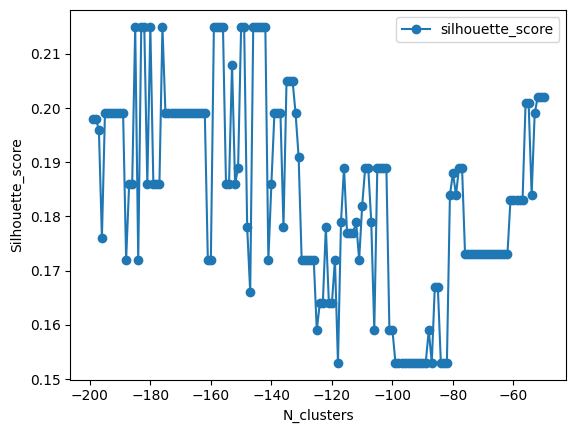

In [20]:
#visualização da metrica
plt.plot(values, ss_list, marker = 'o', label = 'silhouette_score')
plt.xlabel('N_clusters')
plt.ylabel('Silhouette_score')
plt.legend()

In [21]:
best_p = values[np.argmax(ss_list)]
best_p

-142

In [22]:
# n_clusters
n_cluster = len(np.unique(labels))

In [23]:
n_cluster

3

## 2.2 Final Model

In [24]:
# model definition
Af = AffinityPropagation(preference = best_p)

#treinamento
labels = Af.fit(x)

# predict
labels = Af.predict(x)

# performance
ss_score = np.round(mt.silhouette_score(x,labels), 3)
print(f'Silhouette Score: {ss_score}')
print(f'N_clusters: {n_cluster}')

Silhouette Score: 0.215
N_clusters: 3


# 3.0 Save Results

In [32]:
metrics = {
    'Algoritmo'   : 'Affinity_Propagation',
    'N_cluesters' : n_cluster,
    'Average Silhouette Score': ss_score,
}

df = pd.DataFrame([metrics])

df.to_csv(
    './metrics_clusterizacao.csv',
    mode='a',
    index=False,
    header=not os.path.exists('./metrics_clusterizacao.csv')
)